In [1]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import torchvision.transforms.functional as F
import torchvision.models.detection as detection
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [95]:
#We will use the pre-trained FasterRCNN_ResNet50_FPN model. This model is trained with the COCO dataset
#Let us see the COCO dataset classes. These classes will be printed in the image
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights

# Load the metadata for the pre-trained model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
COCO_CLASSES = weights.meta["categories"]  # Fetch the class names dynamically

print(COCO_CLASSES) 

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


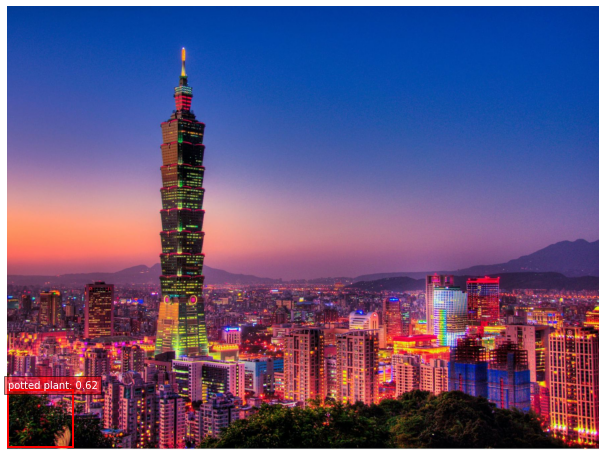

Number of objects detected: 1
Inference Time: 795.52 ms


In [139]:
import time
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "1.jpg"
image = Image.open(image_path)
image_tensor = F.to_tensor(image)  # Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.

# Step 3: Perform object detection
start_time = time.time()  # Start timing
with torch.no_grad():
    predictions = model([image_tensor])
end_time = time.time()  # End timing

# Calculate inference time in milliseconds
inference_time_ms = (end_time - start_time) * 1000

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

# Filter predictions by confidence threshold. Assuming interest only in predictions above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

# Print the number of objects detected and the inference time
num_objects_detected = len(filtered_boxes)
print(f"Number of objects detected: {num_objects_detected}")
print(f"Inference Time: {inference_time_ms:.2f} ms")


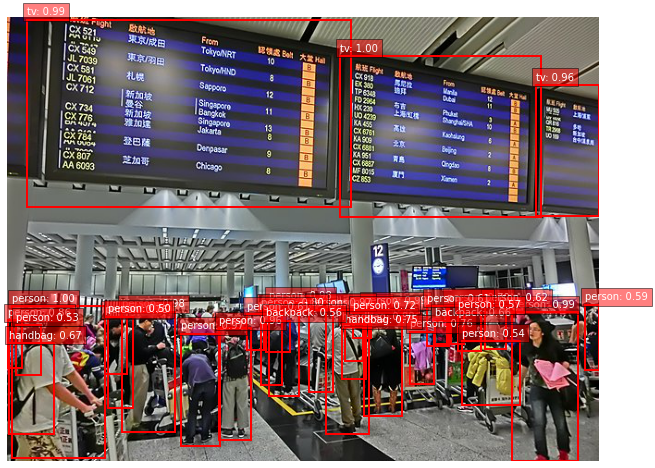

Number of objects detected: 31
Inference Time: 735.89 ms


In [141]:
import time
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "2.jpg"
image = Image.open(image_path)
image_tensor = F.to_tensor(image)  # Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.

# Step 3: Perform object detection
start_time = time.time()  # Start timing
with torch.no_grad():
    predictions = model([image_tensor])
end_time = time.time()  # End timing

# Calculate inference time in milliseconds
inference_time_ms = (end_time - start_time) * 1000

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

# Filter predictions by confidence threshold. Assuming interest only in predictions above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

# Print the number of objects detected and the inference time
num_objects_detected = len(filtered_boxes)
print(f"Number of objects detected: {num_objects_detected}")
print(f"Inference Time: {inference_time_ms:.2f} ms")


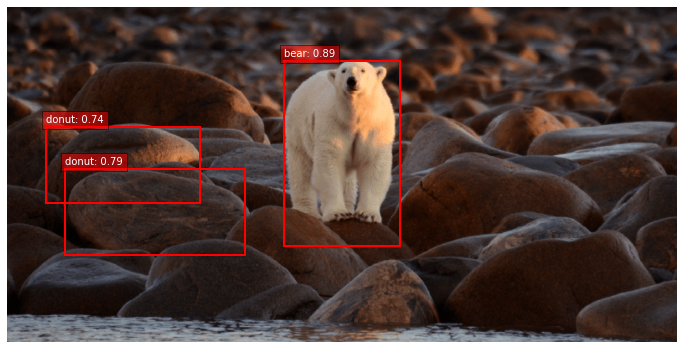

Number of objects detected: 3
Inference Time: 744.65 ms


In [143]:
import time
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "3.jpg"
image = Image.open(image_path)
image_tensor = F.to_tensor(image)  # Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.

# Step 3: Perform object detection
start_time = time.time()  # Start timing
with torch.no_grad():
    predictions = model([image_tensor])
end_time = time.time()  # End timing

# Calculate inference time in milliseconds
inference_time_ms = (end_time - start_time) * 1000

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

# Filter predictions by confidence threshold. Assuming interest only in predictions above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

# Print the number of objects detected and the inference time
num_objects_detected = len(filtered_boxes)
print(f"Number of objects detected: {num_objects_detected}")
print(f"Inference Time: {inference_time_ms:.2f} ms")


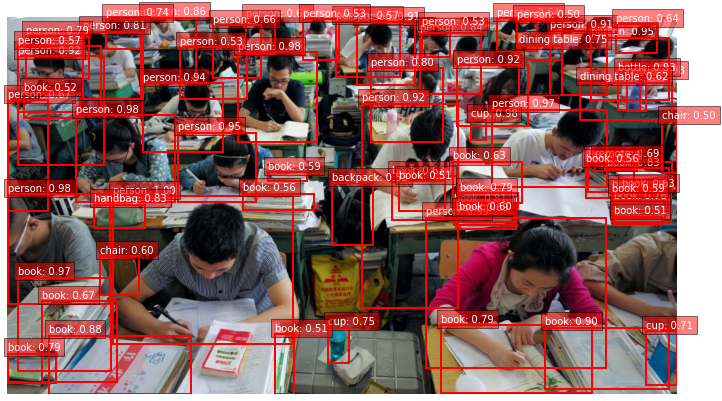

Number of objects detected: 68
Inference Time: 981.96 ms


In [145]:
import time
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "4.jpg"
image = Image.open(image_path)
image_tensor = F.to_tensor(image)  # Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.

# Step 3: Perform object detection
start_time = time.time()  # Start timing
with torch.no_grad():
    predictions = model([image_tensor])
end_time = time.time()  # End timing

# Calculate inference time in milliseconds
inference_time_ms = (end_time - start_time) * 1000

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

# Filter predictions by confidence threshold. Assuming interest only in predictions above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

# Print the number of objects detected and the inference time
num_objects_detected = len(filtered_boxes)
print(f"Number of objects detected: {num_objects_detected}")
print(f"Inference Time: {inference_time_ms:.2f} ms")


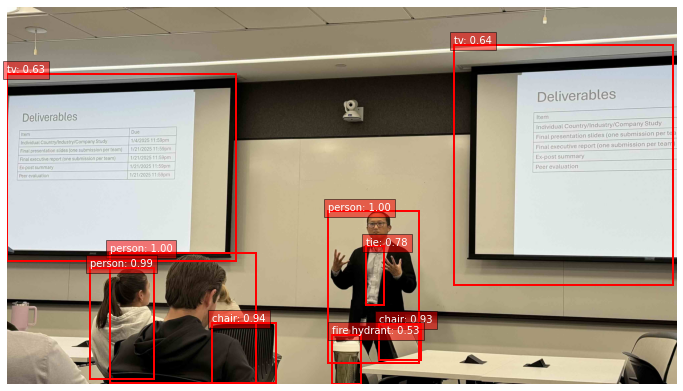

Number of objects detected: 9
Inference Time: 921.68 ms


In [159]:
import time
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "5.jpg"
image = Image.open(image_path)
image_tensor = F.to_tensor(image)  # Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.

# Step 3: Perform object detection
start_time = time.time()  # Start timing
with torch.no_grad():
    predictions = model([image_tensor])
end_time = time.time()  # End timing

# Calculate inference time in milliseconds
inference_time_ms = (end_time - start_time) * 1000

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

# Filter predictions by confidence threshold. Assuming interest only in predictions above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

# Print the number of objects detected and the inference time
num_objects_detected = len(filtered_boxes)
print(f"Number of objects detected: {num_objects_detected}")
print(f"Inference Time: {inference_time_ms:.2f} ms")


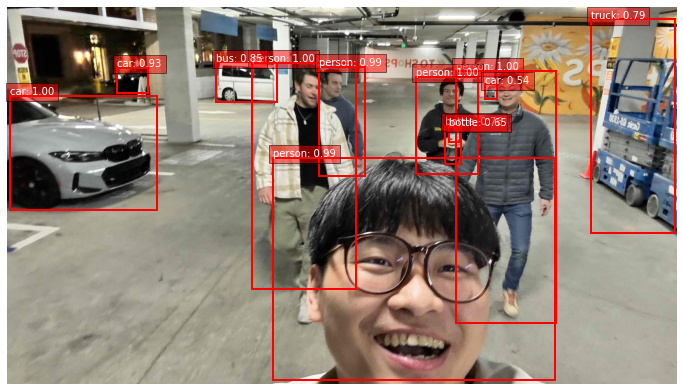

Number of objects detected: 12
Inference Time: 982.91 ms


In [153]:
import time
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "6.jpg"
image = Image.open(image_path)
image_tensor = F.to_tensor(image)  # Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.

# Step 3: Perform object detection
start_time = time.time()  # Start timing
with torch.no_grad():
    predictions = model([image_tensor])
end_time = time.time()  # End timing

# Calculate inference time in milliseconds
inference_time_ms = (end_time - start_time) * 1000

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

# Filter predictions by confidence threshold. Assuming interest only in predictions above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

# Print the number of objects detected and the inference time
num_objects_detected = len(filtered_boxes)
print(f"Number of objects detected: {num_objects_detected}")
print(f"Inference Time: {inference_time_ms:.2f} ms")


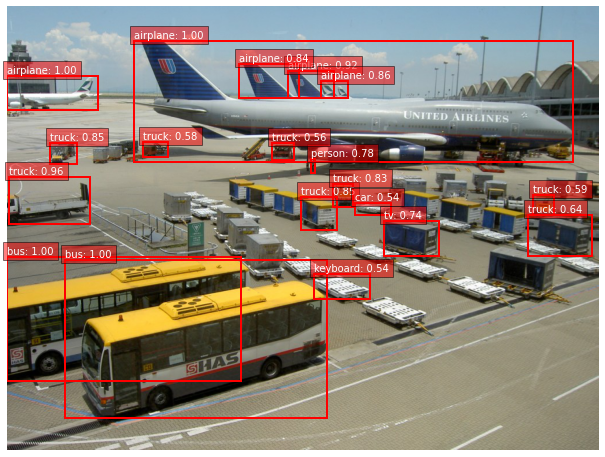

Number of objects detected: 19
Inference Time: 677.76 ms


In [155]:
import time
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "7.jpg"
image = Image.open(image_path)
image_tensor = F.to_tensor(image)  # Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.

# Step 3: Perform object detection
start_time = time.time()  # Start timing
with torch.no_grad():
    predictions = model([image_tensor])
end_time = time.time()  # End timing

# Calculate inference time in milliseconds
inference_time_ms = (end_time - start_time) * 1000

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

# Filter predictions by confidence threshold. Assuming interest only in predictions above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

# Print the number of objects detected and the inference time
num_objects_detected = len(filtered_boxes)
print(f"Number of objects detected: {num_objects_detected}")
print(f"Inference Time: {inference_time_ms:.2f} ms")
